# ***Libraries***

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

# Startup DataSet

In [73]:
startups=pd.read_csv("50_Startups.csv")

In [74]:
startups.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [75]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [76]:
startups.shape

(50, 5)

In [77]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [78]:
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


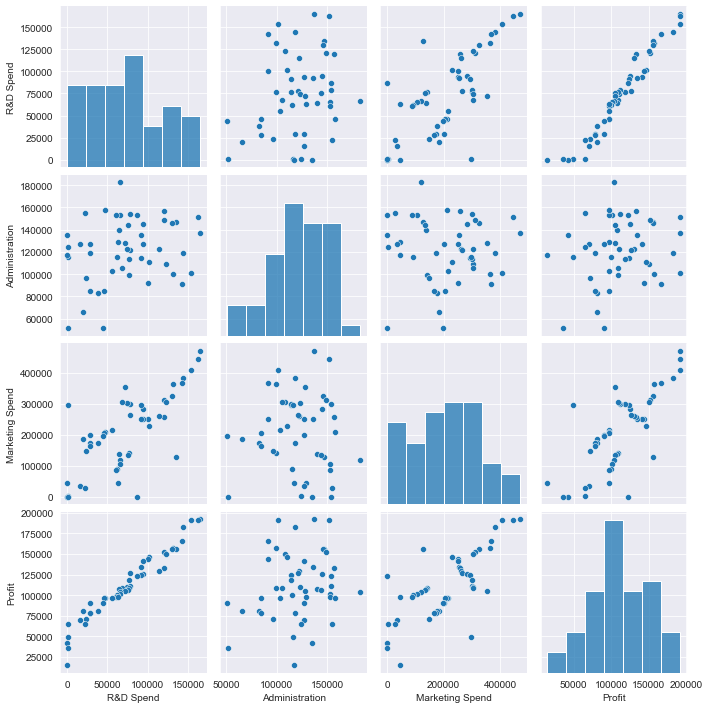

In [79]:
sns.set_style(style="darkgrid")
sns.pairplot(startups)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dc9dbb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dc9e7280>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3dc9db790>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dc9e79a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dc9e7d30>],
 'means': []}

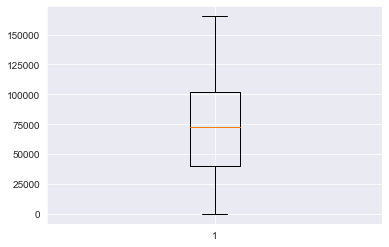

In [80]:
plt.boxplot(startups["R&D Spend"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dca46370>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dca46a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3dca37fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dca521f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dca52580>],
 'means': []}

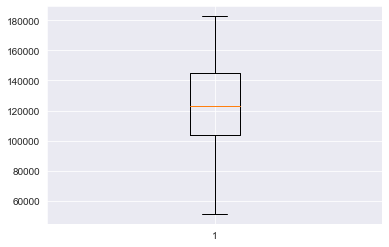

In [81]:
plt.boxplot(startups["Administration"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dd4f1190>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dd4f18b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3dca9fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dd4f1fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dd4fa3a0>],
 'means': []}

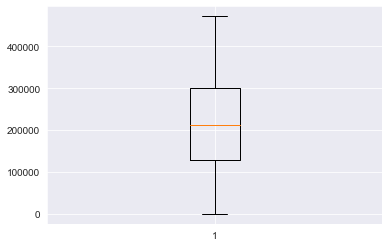

In [82]:
plt.boxplot(startups["Marketing Spend"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dd54f370>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dd54fa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3dd541fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dd55c1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dd55c580>],
 'means': []}

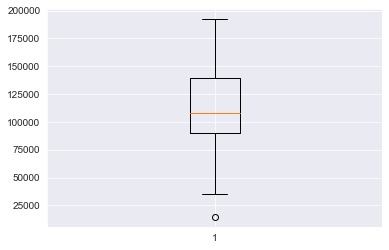

In [83]:
plt.boxplot(startups["Profit"])

There's a outlier in profit column which needs to be treated so replaced outlier with Median as shown below.

In [84]:
median=startups.loc[startups["Profit"]>25000].median()

<ipython-input-84-21b2c4e6ca19>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median=startups.loc[startups["Profit"]>25000].median()


In [85]:
median.head()

R&D Spend           73994.56
Administration     122782.75
Marketing Spend    214634.81
Profit             108552.04
dtype: float64

In [86]:
startups["Profit"]=startups["Profit"].mask(startups["Profit"]<25000,median["Profit"])

In [87]:
median["Profit"]

108552.04

In [88]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,113890.052000
std,45902.256482,28017.802755,122290.310726,37787.588984
min,0.000000,51283.140000,0.000000,35673.410000
25%,39936.370000,103730.875000,129300.132500,92151.020000
50%,73051.080000,122699.795000,212716.240000,108552.040000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [89]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


{'whiskers': [<matplotlib.lines.Line2D at 0x1f3dd5bd6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3dd5bddc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3dd5bd310>],
 'medians': [<matplotlib.lines.Line2D at 0x1f3dd5c7520>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f3dd5c78b0>],
 'means': []}

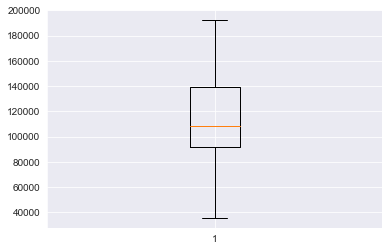

In [90]:
plt.boxplot(startups["Profit"])

No Outliers found in a dataset proceeding with model Building

## Normal Model

In [91]:
#Column Rename
startups1=startups.rename({"R&D Spend":"R_Spend", "Marketing Spend":"M_Spend"}, axis=1)

In [92]:
startups1.head()

,R_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [93]:
norm_model=smf.ols("Profit~R_Spend+Administration+M_Spend+State", data=startups1).fit()

In [94]:
norm_model.params

Intercept            58316.845755
State[T.Florida]     -4239.508779
State[T.New York]    -4855.580838
R_Spend                  0.749547
Administration          -0.014463
M_Spend                  0.024063
dtype: float64

In [95]:
norm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     102.2
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           4.54e-23
Time:                        14:11:00   Log-Likelihood:                -534.06
No. Observations:                  50   AIC:                             1080.
Df Residuals:                      44   BIC:                             1092.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          5.832e+04   8190.081      7.120      0.000    4.18e+04    7.48e+04
State[T.Florida]  -4239.5088   4010.101     -1.057      0.296   -1.23e+04    3842.318
State[T.New York] -4855.5808   3873.336     -1.254      0.217   -1.27e+04    2950.616
R_Spend               0.7495      0.055     13.578      0.000       0.638       0.861
Administration       -0.0145      0.062     -0.233      0.817      -0.140       0.111
M_Spend               0.0241      0.020      1.180      0.244      -0.017       0.065
==============================================================================
Omnibus:                       43.120   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.069
Skew:                           2.160   Prob(JB):                     1.96e-42
Kurtosis:                      11.575   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
startups1.corr()

,R_Spend,Administration,M_Spend,Profit
R_Spend,1.000000,0.241955,0.724248,0.956323
Administration,0.241955,1.000000,-0.032154,0.206204
M_Spend,0.724248,-0.032154,1.000000,0.728849
Profit,0.956323,0.206204,0.728849,1.000000


eval_env: 1


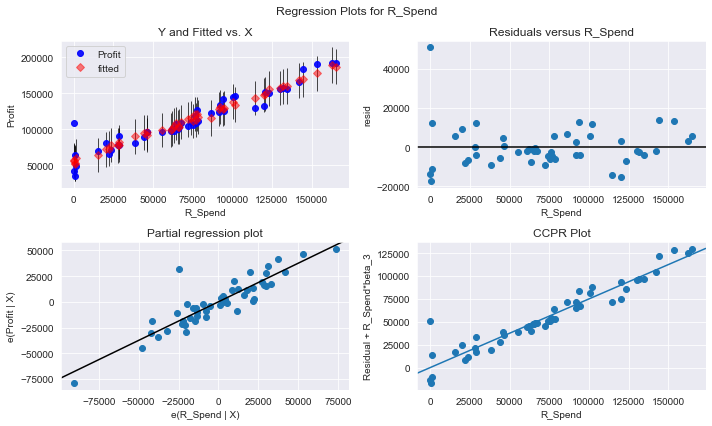

In [97]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model,"R_Spend", fig=fig)

eval_env: 1


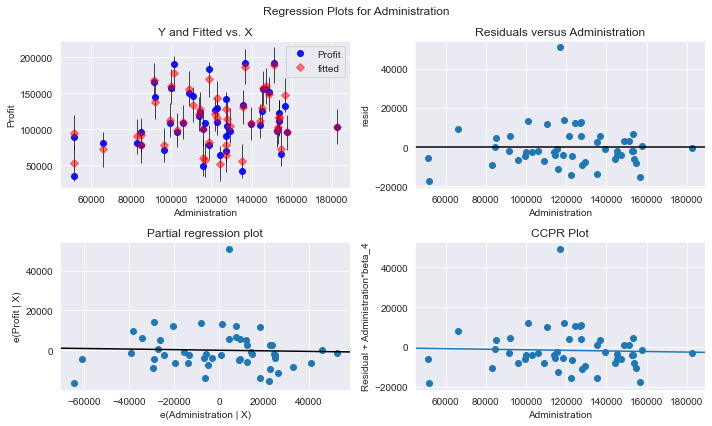

In [98]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model,"Administration", fig=fig)

eval_env: 1


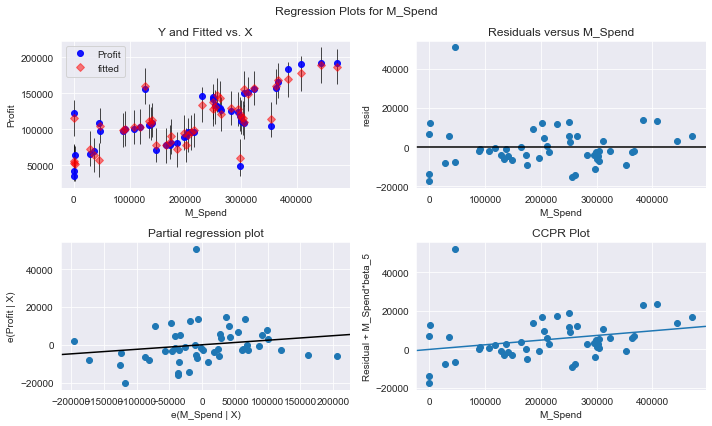

In [99]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model,"M_Spend", fig=fig)

In [100]:
#Trying new model with DUmmy variable for State Column
startups1.head()

,R_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [101]:
startups_dummy=pd.get_dummies(startups["State"])

In [102]:
startups_dummy.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [103]:
startups1[['California','Florida','New York']]=startups_dummy

In [104]:
startups1.head()

,R_Spend,Administration,M_Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [105]:
startups2=startups1.drop(["State"], axis=1)
startups2.head()

,R_Spend,Administration,M_Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [106]:
startups2=startups2.rename({"New York":"Newyork"},axis=1)
startups2.head()

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [107]:
startups2.corr()

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
R_Spend,1.000000,0.241955,0.724248,0.956323,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.206204,-0.015478,0.010493,0.005145
M_Spend,0.724248,-0.032154,1.000000,0.728849,-0.168875,0.205685,-0.033670
Profit,0.956323,0.206204,0.728849,1.000000,-0.085633,0.089564,-0.002563
California,-0.143165,-0.015478,-0.168875,-0.085633,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.089564,-0.492366,1.000000,-0.492366
Newyork,0.039068,0.005145,-0.033670,-0.002563,-0.515152,-0.492366,1.000000


In [108]:
norm_model_dummy=smf.ols("Profit~R_Spend+Administration+M_Spend+Profit+California+Florida+Newyork",startups2).fit()

In [109]:
norm_model_dummy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.910e+30
Date:                Tue, 25 Jan 2022   Prob (F-statistic):               0.00
Time:                        14:11:05   Log-Likelihood:                 1096.5
No. Observations:                  50   AIC:                            -2179.
Df Residuals:                      43   BIC:                            -2166.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.183e-11   6.05e-11      0.361      0.720      -1e-10    1.44e-10
R_Spend                 0   8.75e-16          0      1.000   -1.76e-15    1.76e-15
Administration  9.714e-17   4.33e-16      0.225      0.823   -7.75e-16     9.7e-16
M_Spend         1.527e-16   1.44e-16      1.059      0.295   -1.38e-16    4.43e-16
Profit             1.0000   1.05e-15   9.53e+14      0.000       1.000       1.000
California     -1.182e-11   2.69e-11     -0.439      0.663   -6.61e-11    4.24e-11
Florida         1.819e-11   2.62e-11      0.695      0.491   -3.46e-11     7.1e-11
Newyork        -9.095e-13   2.41e-11     -0.038      0.970   -4.96e-11    4.77e-11
==============================================================================
Omnibus:                        4.489   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                1.976
Skew:                          -0.097   Prob(JB):                        0.372
Kurtosis:                       2.046   Cond. No.                     5.77e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

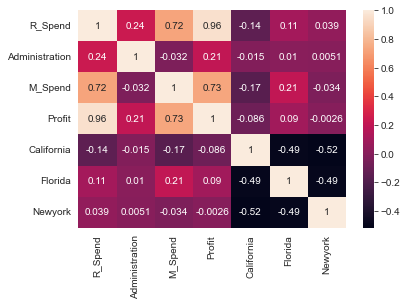

In [110]:
sns.heatmap(startups2.corr(), annot= True)

In [111]:
(norm_model.tvalues,norm_model.pvalues)

(Intercept             7.120424
 State[T.Florida]     -1.057208
 State[T.New York]    -1.253591
 R_Spend              13.577517
 Administration       -0.232767
 M_Spend               1.180012
 dtype: float64,
 Intercept            7.616888e-09
 State[T.Florida]     2.961869e-01
 State[T.New York]    2.166108e-01
 R_Spend              2.447818e-17
 Administration       8.170217e-01
 M_Spend              2.443359e-01
 dtype: float64)

In [112]:
np.round(norm_model.pvalues,5)

Intercept            0.00000
State[T.Florida]     0.29619
State[T.New York]    0.21661
R_Spend              0.00000
Administration       0.81702
M_Spend              0.24434
dtype: float64

In [113]:
startups1=startups1.drop(["State"], axis=1)
startups1.head(2)

,R_Spend,Administration,M_Spend,Profit,California,Florida,New York
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [114]:
startups1=startups1.rename({"New York":"Newyork"},axis=1)
norm_model2=smf.ols("Profit~R_Spend+Administration+M_Spend+California+Florida+Newyork",startups1).fit()

In [115]:
(norm_model2.tvalues, norm_model2.pvalues)

(Intercept          6.869970
 R_Spend           13.577517
 Administration    -0.232767
 M_Spend            1.180012
 California         5.782971
 Florida            3.888676
 Newyork            4.056270
 dtype: float64,
 Intercept         1.773408e-08
 R_Spend           2.447818e-17
 Administration    8.170217e-01
 M_Spend           2.443359e-01
 California        7.027433e-07
 Florida           3.366116e-04
 Newyork           2.007257e-04
 dtype: float64)

In [116]:
norm_model.params

Intercept            58316.845755
State[T.Florida]     -4239.508779
State[T.New York]    -4855.580838
R_Spend                  0.749547
Administration          -0.014463
M_Spend                  0.024063
dtype: float64

In [117]:
startups1.corr()

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
R_Spend,1.000000,0.241955,0.724248,0.956323,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.206204,-0.015478,0.010493,0.005145
M_Spend,0.724248,-0.032154,1.000000,0.728849,-0.168875,0.205685,-0.033670
Profit,0.956323,0.206204,0.728849,1.000000,-0.085633,0.089564,-0.002563
California,-0.143165,-0.015478,-0.168875,-0.085633,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.089564,-0.492366,1.000000,-0.492366
Newyork,0.039068,0.005145,-0.033670,-0.002563,-0.515152,-0.492366,1.000000


In [118]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [119]:
startups=startups.rename({"R&D Spend":"R_Spend","Marketing Spend":"M_Spend"}, axis=1)

In [120]:
startups.head()

,R_Spend,Administration,M_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [121]:
norm_model3=smf.ols("Profit~R_Spend+Administration+M_Spend+State", startups).fit()

In [122]:
norm_model3.pvalues

Intercept            7.616888e-09
State[T.Florida]     2.961869e-01
State[T.New York]    2.166108e-01
R_Spend              2.447818e-17
Administration       8.170217e-01
M_Spend              2.443359e-01
dtype: float64

In [123]:
model1=pd.DataFrame({"Model1 Pvalues":norm_model.pvalues})

In [124]:
model1.head(10)

,Model1 Pvalues
Intercept,7.616888e-09
State[T.Florida],2.961869e-01
State[T.New York],2.166108e-01
R_Spend,2.447818e-17
Administration,8.170217e-01
M_Spend,2.443359e-01


In [125]:
model2=pd.DataFrame({"Model2 Pvalues":(np.round(norm_model2.pvalues,6))})
model2.head(10)

,Model2 Pvalues
Intercept,0.000000
R_Spend,0.000000
Administration,0.817022
M_Spend,0.244336
California,0.000001
Florida,0.000337
Newyork,0.000201


In [126]:
model3=pd.DataFrame({"Model3 Pvalues":norm_model3.pvalues})
model3.head()

,Model3 Pvalues
Intercept,7.616888e-09
State[T.Florida],2.961869e-01
State[T.New York],2.166108e-01
R_Spend,2.447818e-17
Administration,8.170217e-01


Model2 has Significant Column Values as Compared to Model 1 and Model 3. 
So working on Model 2 to improve it

In [127]:
model2.head(10)

,Model2 Pvalues
Intercept,0.000000
R_Spend,0.000000
Administration,0.817022
M_Spend,0.244336
California,0.000001
Florida,0.000337
Newyork,0.000201


In [128]:
n_model2=smf.ols("Profit~R_Spend+California+Florida+Newyork", startups1).fit()

In [129]:
n_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     170.5
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           6.36e-25
Time:                        14:11:09   Log-Likelihood:                -535.06
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.157e+04   2286.535     18.179      0.000     3.7e+04    4.62e+04
R_Spend        0.7929      0.035     22.487      0.000       0.722       0.864
California  1.659e+04   2282.908      7.268      0.000     1.2e+04    2.12e+04
Florida      1.32e+04   2476.570      5.330      0.000    8215.408    1.82e+04
Newyork     1.177e+04   2375.482      4.956      0.000    6992.345    1.66e+04
==============================================================================
Omnibus:                       38.681   Durbin-Watson:                   1.586
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.896
Skew:                           1.947   Prob(JB):                     4.65e-33
Kurtosis:                      10.504   Cond. No.                     1.71e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

VIF Calculation

In [130]:
startups1.head(2)

,R_Spend,Administration,M_Spend,Profit,California,Florida,Newyork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


In [131]:
#VIF Calculation for all variable
rsq_R_Spend=smf.ols("R_Spend~Administration+M_Spend+California+Florida+Newyork", startups1).fit().rsquared
vif_R_Spend=1/(1-rsq_R_Spend)

#vif for administration
rsq_administration=smf.ols("Administration~R_Spend+M_Spend+California+Florida+Newyork", startups1).fit().rsquared
vif_Administration=1/(1-rsq_administration)

#Vif for M_spend
rsq_M_Spend=smf.ols("M_Spend~R_Spend+Administration+California+Florida+Newyork", startups1).fit().rsquared
vif_M_Spend=1/(1-rsq_M_Spend)

#Vif for
rsq_California=smf.ols("California~R_Spend+Administration+M_Spend+Florida+Newyork", startups1).fit().rsquared
vif_California=1/(1-rsq_California)

<ipython-input-131-820448698f31>:15: RuntimeWarning: divide by zero encountered in double_scalars
  vif_California=1/(1-rsq_California)


In [132]:
#Vif for
rsq_Florida=smf.ols("Florida~R_Spend+Administration+M_Spend+California+Newyork", startups1).fit().rsquared
vif_Florida=1/(1-rsq_Florida)

#Vif for
rsq_Newyork=smf.ols("Newyork~R_Spend+Administration+M_Spend+California+Florida", startups1).fit().rsquared
vif_Newyork=1/(1-rsq_Newyork)

<ipython-input-132-57f81c47312d>:3: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Florida=1/(1-rsq_Florida)
<ipython-input-132-57f81c47312d>:7: RuntimeWarning: divide by zero encountered in double_scalars
  vif_Newyork=1/(1-rsq_Newyork)


VIF for states are Infinite so Dropping the State Columns

In [133]:
d1={"Variable":["R_Spend","Administration","M_Spend","California","Florida","Newyork"],"VIF":[vif_R_Spend,vif_Administration,vif_M_Spend,vif_California,vif_Florida,vif_Newyork]}

In [134]:
vif_frame=pd.DataFrame(d1)
vif_frame

,Variable,VIF
0,R_Spend,2.495511
1,Administration,1.177766
2,M_Spend,2.416797
3,California,inf
4,Florida,inf
5,Newyork,inf


In [135]:
startups1=startups1.iloc[:,:4]
startups1.head(3)

,R_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


In [136]:
norm_model2=smf.ols("Profit~R_Spend+Administration+M_Spend", startups1).fit()
startups1.head(5)

,R_Spend,Administration,M_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [137]:
# Norm_model2 Rebuild without State columns
norm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     170.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           6.47e-25
Time:                        14:11:10   Log-Likelihood:                -535.08
No. Observations:                  50   AIC:                             1078.
Df Residuals:                      46   BIC:                             1086.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.598e+04   7978.480      7.016      0.000    3.99e+04     7.2e+04
R_Spend            0.7469      0.055     13.628      0.000       0.637       0.857
Administration    -0.0149      0.062     -0.240      0.811      -0.140       0.110
M_Spend            0.0221      0.020      1.105      0.275      -0.018       0.062
==============================================================================
Omnibus:                       46.095   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.626
Skew:                           2.257   Prob(JB):                     1.25e-53
Kurtosis:                      12.827   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:
rsq_R_Spend=smf.ols("R_Spend~Administration+M_Spend", startups1).fit().rsquared
vif_R_Spend=1/(1-rsq_R_Spend)

#vif for administration
rsq_administration=smf.ols("Administration~R_Spend+M_Spend", startups1).fit().rsquared
vif_Administration=1/(1-rsq_administration)

#Vif for M_spend
rsq_M_Spend=smf.ols("M_Spend~R_Spend+Administration", startups1).fit().rsquared
vif_M_Spend=1/(1-rsq_M_Spend)


In [139]:
d1={"Variable":["R_Spend","Administration","M_Spend"],"VIF":[vif_R_Spend,vif_Administration,vif_M_Spend]}

In [140]:
vif_frame=pd.DataFrame(d1)
vif_frame

,Variable,VIF
0,R_Spend,2.468903
1,Administration,1.175091
2,M_Spend,2.326773


### Residual Analysis

#### Test for norality of Residuals

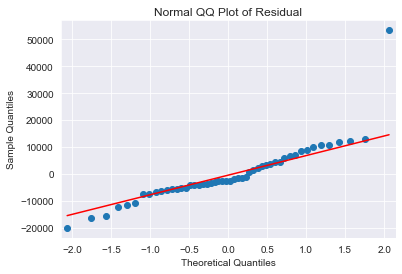

In [141]:
import statsmodels.api as sm
qqplot=sm.qqplot(norm_model2.resid, line='q')
plt.title("Normal QQ Plot of Residual")
plt.show()

#### Residual Plot for homoscedasticity

In [ ]:
def standardised_values(vals):
    return (vals-vals.mean())/vals.std()

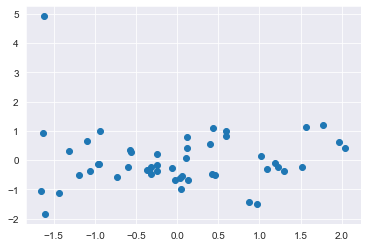

In [ ]:
plt.scatter(standardised_values(norm_model2.fittedvalues),standardised_values(norm_model2.resid))

eval_env: 1


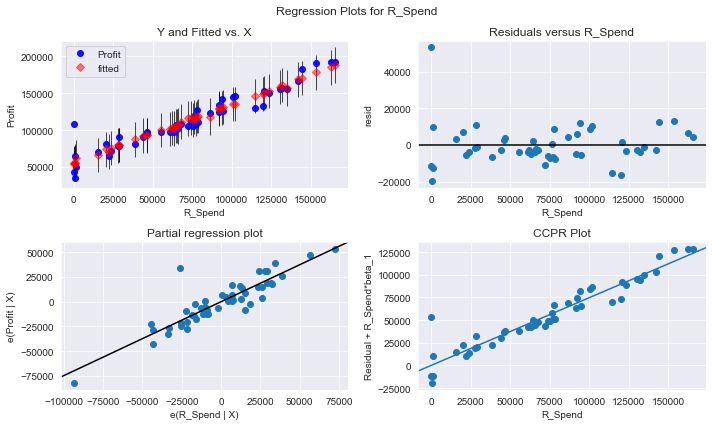

In [ ]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model2,"R_Spend", fig=fig)
plt.show()

eval_env: 1


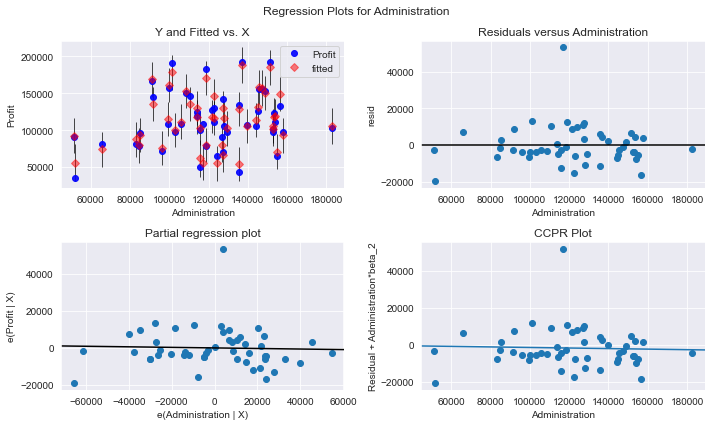

In [ ]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model2,"Administration", fig=fig)
plt.show()

eval_env: 1


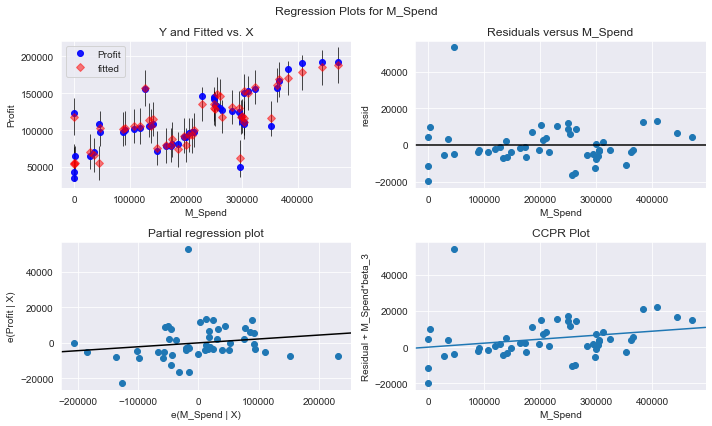

In [ ]:
fig=plt.figure(figsize=(10,6))
fig=sm.graphics.plot_regress_exog(norm_model2,"M_Spend", fig=fig)
plt.show()

## Model Deletion Diagnostics

Detecting Influencer and outliers

##### Cook's Distance

In [ ]:
model_influence=norm_model2.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

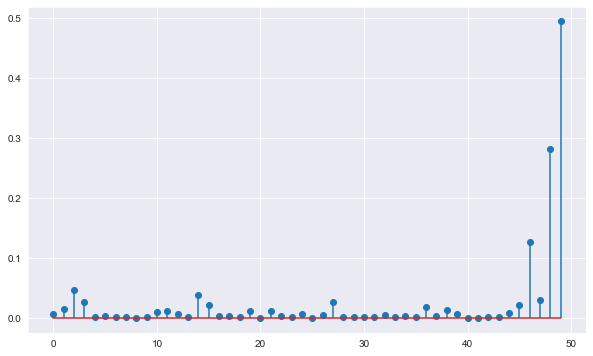

In [ ]:
fig=plt.subplots(figsize=(10,6))
plt.stem(np.arange(len(startups1)),np.round(c,3))

In [ ]:
(np.argmax(c), np.max(c))

(49, 0.4942006234699069)

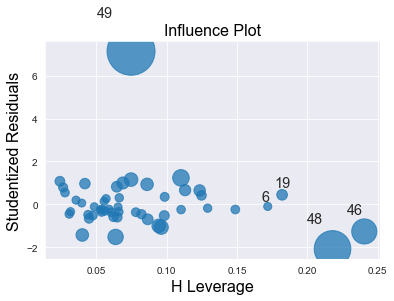

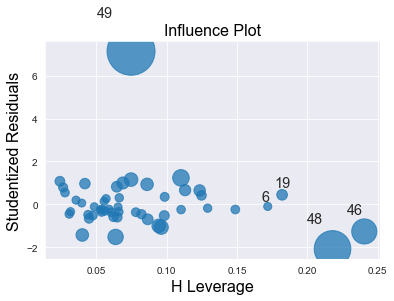

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(norm_model2)

In [ ]:
startups1.head(2)

,R_Spend,Administration,M_Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [ ]:
k=startups1.shape[1]
n=startups1.shape[0]
cutoff=3*((k+1)/n)
cutoff

0.30000000000000004

In [ ]:
startup_f=startups1.drop(startups1.index[[49]], axis=0)
startup_f.head(2)

,R_Spend,Administration,M_Spend,Profit
0,165349.2,136897.80,471784.10,192261.83
1,162597.7,151377.59,443898.53,191792.06


In [ ]:
norm_model2_revised=smf.ols("Profit~R_Spend+Administration+M_Spend",startup_f).fit()

In [ ]:
norm_model2_revised.tvalues, np.round(norm_model2_revised.pvalues,7)

(Intercept          9.450782
 R_Spend           20.469501
 Administration    -0.517889
 M_Spend            1.825383
 dtype: float64,
 Intercept         0.000000
 R_Spend           0.000000
 Administration    0.607073
 M_Spend           0.074584
 dtype: float64)